<a href="https://colab.research.google.com/github/camoeiras/UFPA_FICCD/blob/main/ficcd_atividade3_oeiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Atividade 3 - Estatística Aplicada
# Desenvolvido conforme o enunciado: Sample distribution, Sampling distribution, TLC e p-value
# Autor: Carlos Oeiras
# Data: 2025-04-27

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Configurações iniciais
ds_color = sns.color_palette("deep")
sns.set(style="whitegrid")

# -------------------------------------------------------------------
# Parte A - Sample distribution and sampling distribution
# -------------------------------------------------------------------

In [ ]:
# 1. Criar uma população Gaussiana
np.random.seed(42)
populacao = np.random.normal(loc=50, scale=10, size=100000)

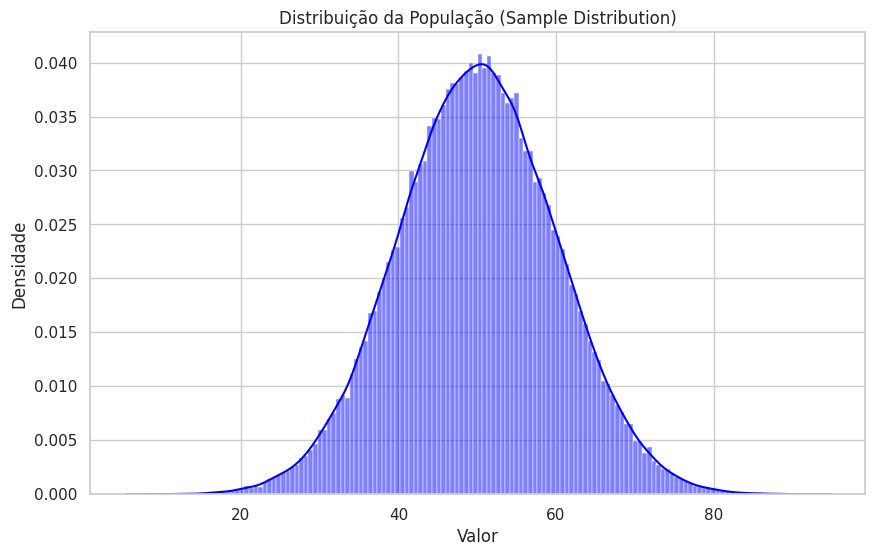

In [ ]:
# 2. Mostrar a sample distribution (população)
plt.figure(figsize=(10, 6))
sns.histplot(populacao, kde=True, color='blue', stat='density')
plt.title('Distribuição da População (Sample Distribution)')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.show()

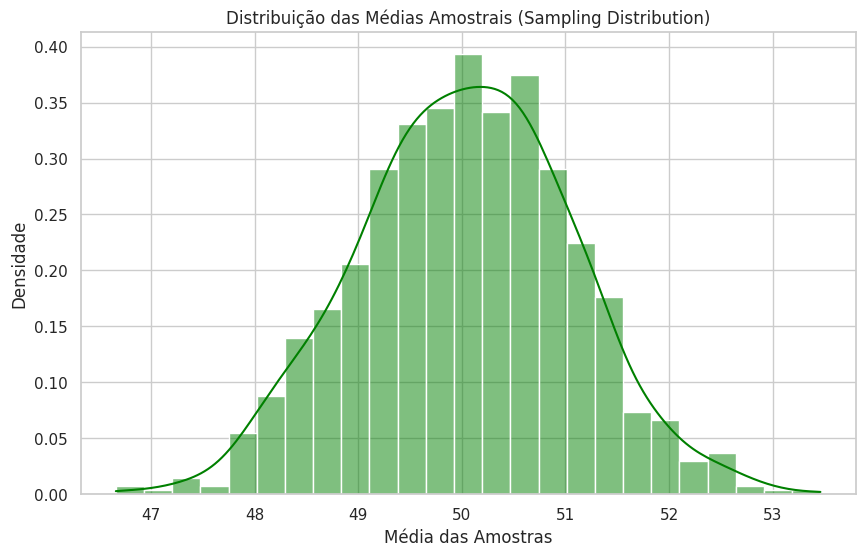

In [ ]:
# 3. Sampling distribution: amostrar médias
amostras = [np.mean(np.random.choice(populacao, size=100)) for _ in range(1000)]

plt.figure(figsize=(10, 6))
sns.histplot(amostras, kde=True, color='green', stat='density')
plt.title('Distribuição das Médias Amostrais (Sampling Distribution)')
plt.xlabel('Média das Amostras')
plt.ylabel('Densidade')
plt.show()

In [ ]:
# 4. Avaliação de probabilidades de eventos
# Probabilidade de um valor na população ser maior que 70
prob = 1 - norm.cdf(70, loc=50, scale=10)
print(f"[Parte A] Probabilidade de um valor > 70 na população: {prob:.4f}")

[Parte A] Probabilidade de um valor > 70 na população: 0.0228


# -------------------------------------------------------------------
# Parte B - TLC (Teorema do Limite Central)
# -------------------------------------------------------------------

In [ ]:
# Criar uma população Gama
pop_gama = np.random.gamma(shape=2, scale=2, size=100000)

In [ ]:
tamanhos = [10, 30, 50, 100]

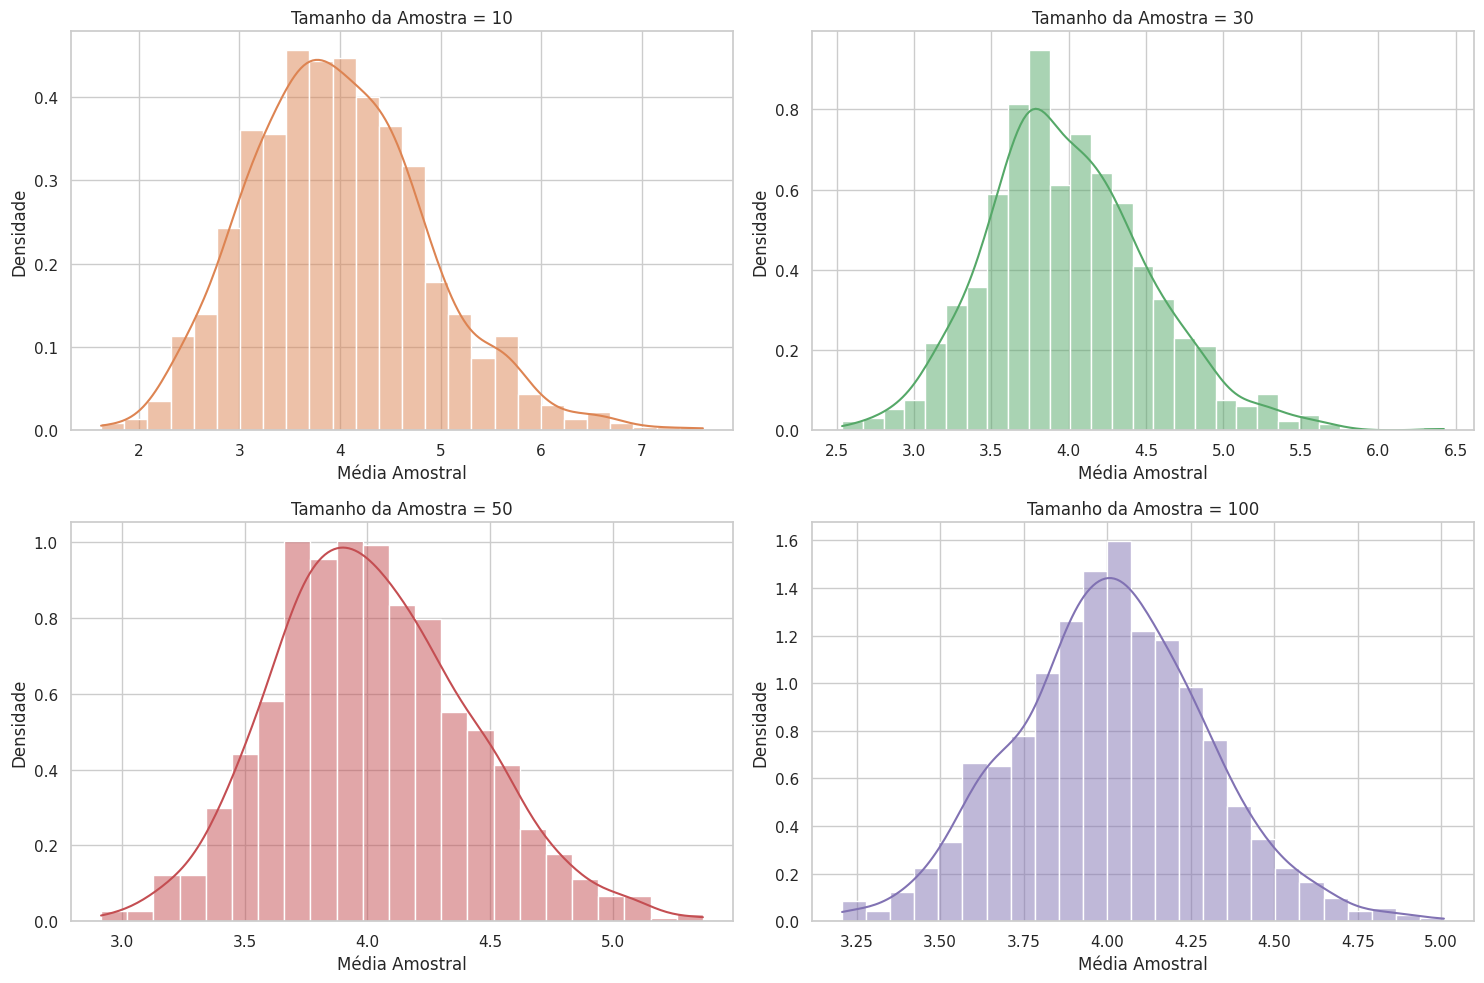

In [ ]:
plt.figure(figsize=(15, 10))
for i, n in enumerate(tamanhos, 1):
    medias = [np.mean(np.random.choice(pop_gama, size=n)) for _ in range(1000)]
    plt.subplot(2, 2, i)
    sns.histplot(medias, kde=True, stat='density', color=ds_color[i%len(ds_color)])
    plt.title(f'Tamanho da Amostra = {n}')
    plt.xlabel('Média Amostral')
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Parte C - p-value (cálculo passo a passo)
# -------------------------------------------------------------------

In [ ]:
# Dados do problema
media_pop = 50
desvio_pop = 10
valor_observado = 65

In [ ]:
# 1. Representação da distribuição populacional
x = np.linspace(20, 80, 1000)
y = norm.pdf(x, loc=media_pop, scale=desvio_pop)

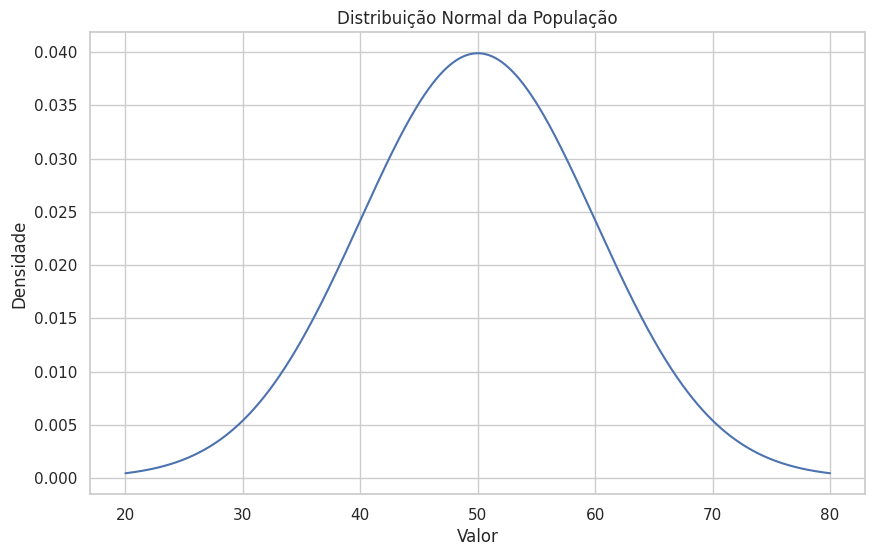

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Distribuição Normal da População')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.show()

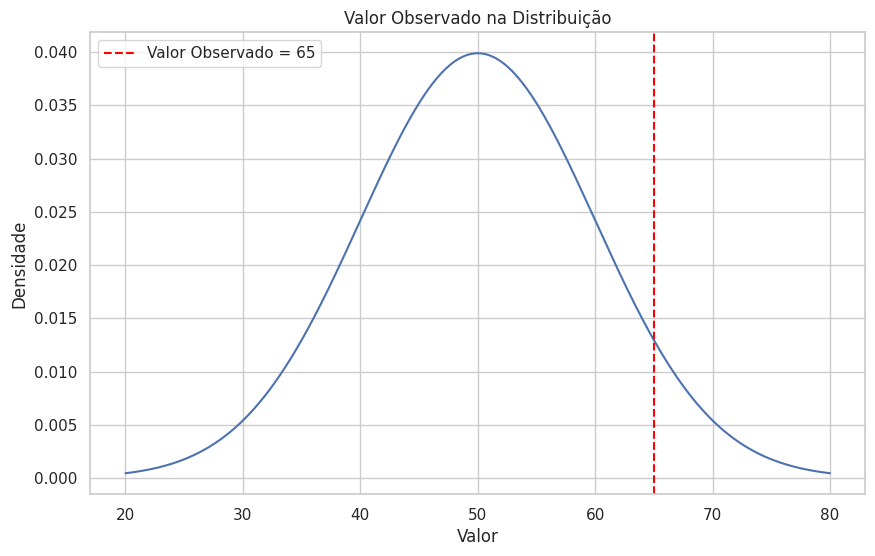

In [ ]:
# 2. Destacar o valor observado
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.axvline(valor_observado, color='red', linestyle='--', label=f'Valor Observado = {valor_observado}')
plt.title('Valor Observado na Distribuição')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [ ]:
# 3. Cálculo do z-score
z_score = (valor_observado - media_pop) / desvio_pop
print(f"[Parte C] Z-score: {z_score:.2f}")

[Parte C] Z-score: 1.50


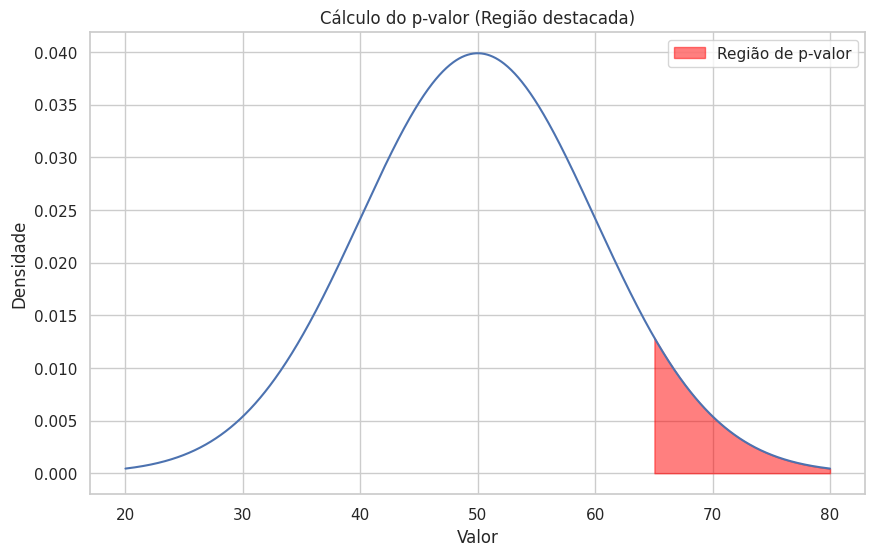

In [ ]:
# 4. Representar graficamente a região de p-valor
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.fill_between(x, 0, y, where=(x >= valor_observado), color='red', alpha=0.5, label='Região de p-valor')
plt.title('Cálculo do p-valor (Região destacada)')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [ ]:
# 5. Cálculo do p-valor (um lado)
p_valor = 1 - norm.cdf(z_score)
print(f"[Parte C] p-valor: {p_valor:.4f}")

[Parte C] p-valor: 0.0668


# -------------------------------------------------------------------
# Parte D - p-value e taxa de falsos negativos
# -------------------------------------------------------------------

In [ ]:
# Criar duas populações normais:
# - População vermelha (hipótese nula): média = 50, desvio = 10
# - População azul (hipótese alternativa): média = 55, desvio = 10
np.random.seed(42)
pop_vermelha = np.random.normal(loc=50, scale=10, size=100000)
pop_azul = np.random.normal(loc=55, scale=10, size=100000)

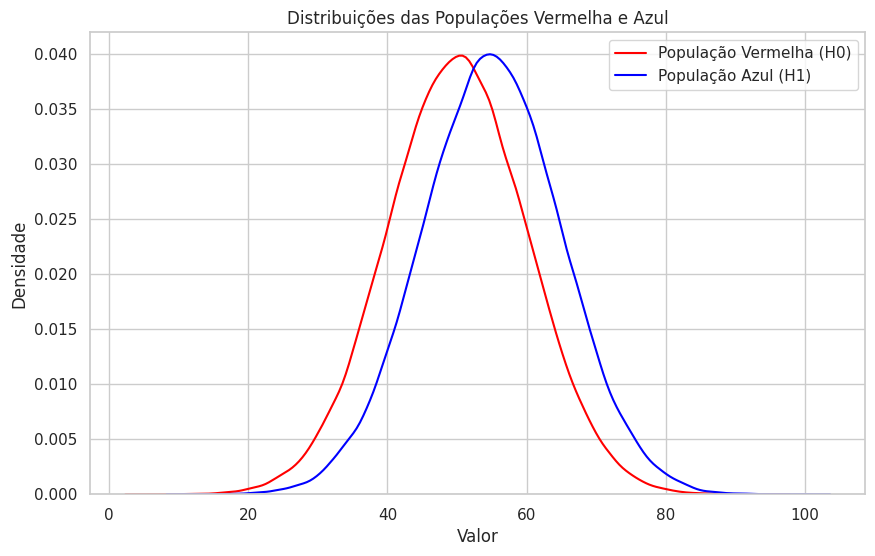

In [ ]:
# Visualização das duas distribuições
plt.figure(figsize=(10, 6))
sns.kdeplot(pop_vermelha, color='red', label='População Vermelha (H0)')
sns.kdeplot(pop_azul, color='blue', label='População Azul (H1)')
plt.title('Distribuições das Populações Vermelha e Azul')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [ ]:
# Procedimento:
# - Sorteio de 100 amostras de tamanho 3 da população azul
# - Para cada amostra, é calculado a média
# - Teste de hipótese usando a população vermelha como referência
# - Se p-valor > 0.05, é considerado falso negativo

falsos_negativos = 0
n_amostras = 100

In [ ]:
for _ in range(n_amostras):
    amostra = np.random.choice(pop_azul, size=3)
    media_amostra = np.mean(amostra)
    erro_padrao = 10 / np.sqrt(3)  # desvio da população vermelha / sqrt(n)

    # Cálculo do z e p-valor
    z = (media_amostra - 50) / erro_padrao
    p_valor = 1 - norm.cdf(z)

    # Avalia falso negativo
    if p_valor > 0.05:
        falsos_negativos += 1

In [ ]:
# Calcular e mostrar a taxa de falso negativo
taxa_falso_negativo = falsos_negativos / n_amostras
print(f"[Parte D] Taxa de falsos negativos: {taxa_falso_negativo:.2%}")

[Parte D] Taxa de falsos negativos: 74.00%


Interpretação estatística:

✅ Hipótese nula (H₀): dados vêm da vermelha.

✅ Hipótese alternativa (H₁): dados vêm da azul.

✅ Os dados realmente vêm da azul, logo a hipótese nula é falsa.

✅ Quando p-valor > 0.05, não rejeitamos H₀.

✅ Portanto, estamos cometendo erro tipo II (falso negativo).

Conclusão:

Mesmo que os dados venham da distribuição azul (média 55), estou testando se eles poderiam ter vindo da vermelha (média 50). Quando o teste não rejeita H₀ (porque p-valor > 0.05), esta errando — porque a verdade é que os dados não vêm da vermelha. Esse erro é um falso negativo.